
Dataset columns: ['age', 'person_income', 'person_home_ownership', 'person_employment_length', 'loan_intent', 'loan_grade', 'loan_amount', 'loan_interest_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_history_length']

Sample data:
   age  person_income person_home_ownership  person_employment_length  \
0   22          59000                  RENT                     123.0   

  loan_intent loan_grade  loan_amount  loan_interest_rate  loan_status  \
0    PERSONAL          D        35000               16.02            1   

   loan_percent_income cb_person_default_on_file  \
0                 0.59                         Y   

   cb_person_cred_history_length  
0                              3  

Model Evaluation Results:
Accuracy: 0.9281
AUC-ROC Score: 0.9279

Confusion Matrix:
[[4409   32]
 [ 378  882]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      4441
        

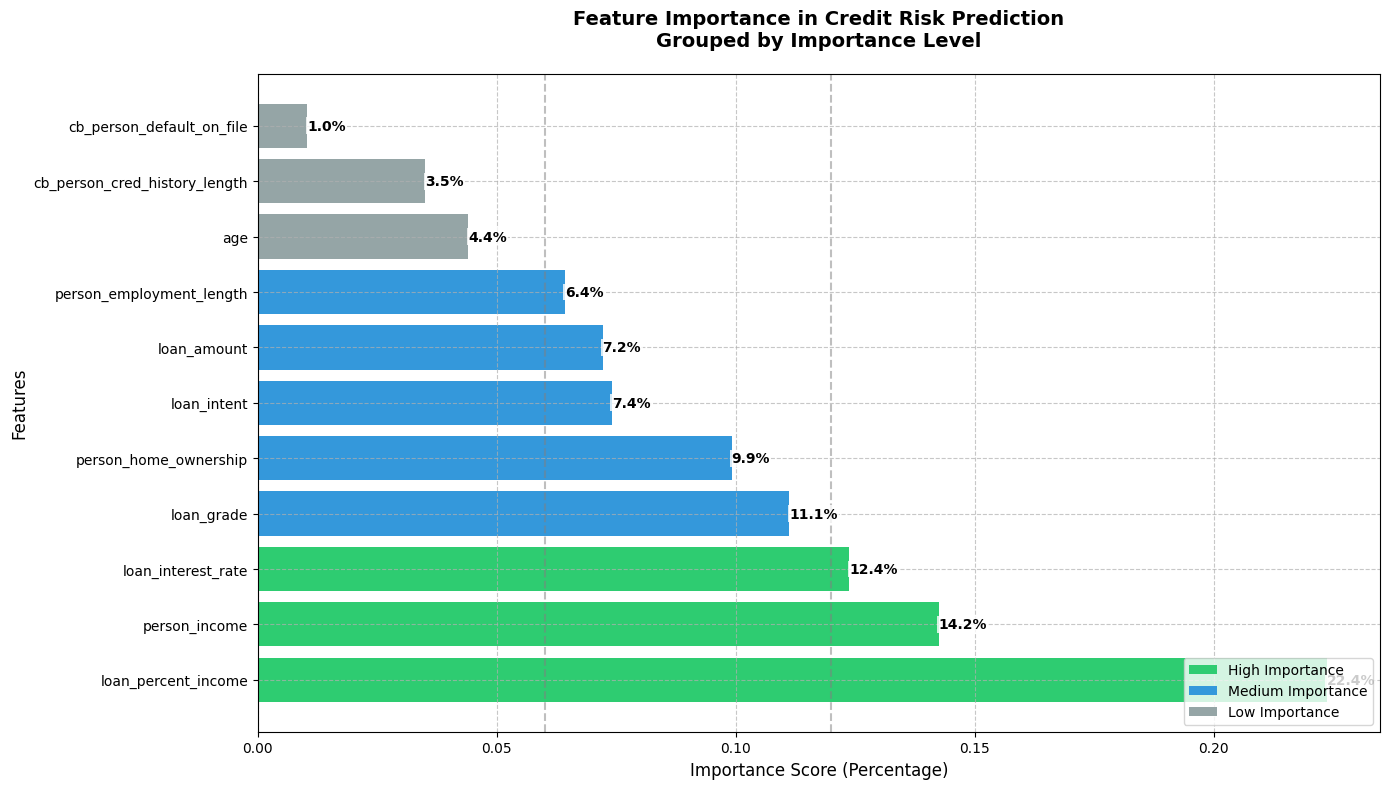


Risk Assessment Results:
Risk Label: Low Risk
Risk Probability: 27.00%


In [1]:
from data_preprocessing import load_and_clean_data, preprocess_data
from model_training import train_model
from evaluate_model import evaluate_model
from feature_importance_plot import plot_feature_importance
from assess_risk import assess_credit_risk
import pandas as pd

# Load and preprocess data
data = load_and_clean_data('credit_risk_dataset.csv')

# Get a sample of the data to understand its structure
print("\nDataset columns:", data.columns.tolist())
print("\nSample data:")
print(data.head(1))

X_train_scaled, X_test_scaled, y_train, y_test, feature_columns, scaler = preprocess_data(data)

# Train the model
model = train_model(X_train_scaled, y_train)

# Evaluate the model
evaluate_model(model, X_test_scaled, y_test)

# Plot feature importance
plot_feature_importance(model, feature_columns)


# Create a sample new application using the same structure as our dataset
new_application = pd.DataFrame({
    'person_age': [30],
    'person_income': [60000],
    'person_emp_length': [5],
    'loan_amnt': [20000],
    'loan_int_rate': [10.5],
    'loan_percent_income': [0.3],
    'cb_person_cred_hist_length': [10]
})

# Assess risk for the new application
risk_label, risk_probability = assess_credit_risk(new_application, model, scaler, feature_columns)
print(f"\nRisk Assessment Results:")
print(f"Risk Label: {risk_label}")
print(f"Risk Probability: {risk_probability:.2%}")
